# 3 Method

## 3.1 The Noise Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameter list
The following parameters have tentative values.

In [ ]:
alpha = 0.5    # Quantum efficiency factor
gain = 10      # Analog gain
sigma_d = 5    # Variance of dark noise
sigma_r = 5    # Variance of read and quantization noise

The expected number of photons hitting each element, U_exp (u* in the paper), is given as a gradient 2D array of 100 images, as shown in the figure "U_exp image".

The figure "U_exp profile" visualizes the change in values by plotting the first row.

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]


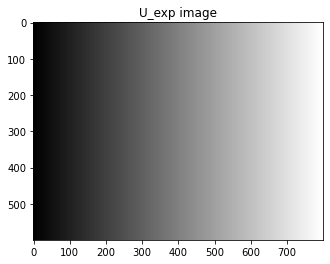

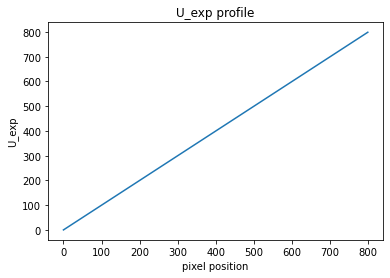

In [ ]:
imgsize = (100, 600, 800)  # number of images, vertical size, horizontal size
U_exp = np.tile(np.arange(0,imgsize[2]),(imgsize[0],imgsize[1],1))  # the expected number of photons hitting the pixel area (u* in the paper)

print(U_exp[0])
plt.title('U_exp image')
plt.imshow(U_exp[0], 'gray')
plt.show()
plt.title('U_exp profile')
plt.plot(U_exp[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('U_exp')
plt.show()

### Implementation of Equation (1)
$$
x^* = g \alpha u^* \tag{1}
$$
Since it does not include noise, it has the same distribution as the above "U_exp image" and "U_exp profile".

[[   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 ...
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]]


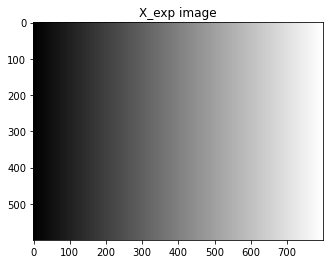

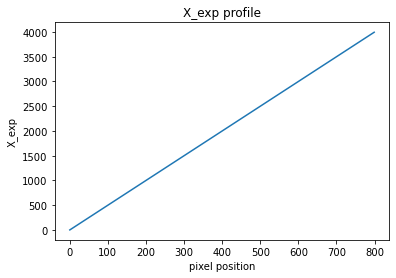

In [ ]:
X_exp = gain * alpha * U_exp  # x* in the paper

print(X_exp[0])
plt.title('X_exp image')
plt.imshow(X_exp[0], 'gray')
plt.show()
plt.title('X_exp profile')
plt.plot(X_exp[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_exp')
plt.show()

### Implementation of Equation (3)
$$
u \sim P(u^*) \tag{3}
$$
From the "U_act profile", it can be seen that as $ u^* $ increases, the variation in $ u $ also increases.

[[  0   0   3 ... 765 790 797]
 [  0   1   2 ... 745 799 801]
 [  0   3   0 ... 800 798 776]
 ...
 [  0   0   1 ... 830 841 800]
 [  0   1   0 ... 780 821 767]
 [  0   0   2 ... 781 820 786]]


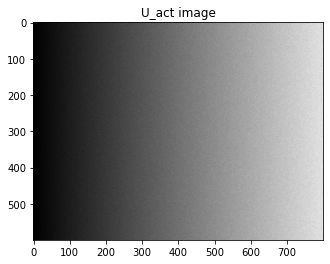

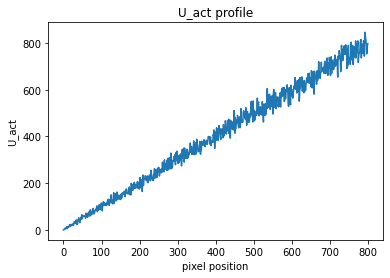

In [ ]:
U_act = np.random.poisson(U_exp)  # The actual collected amount of photons (u in the paper)

print(U_act[0])
plt.title('U_act image')
plt.imshow(U_act[0], 'gray')
plt.show()
plt.title('U_act profile')
plt.plot(U_act[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('U_act')
plt.show()

### Implementation of Equation (5)
$$
x \sim kP\left(\frac{x^*}{k}\right) + N(0,\sigma^2) \tag{5}
$$

In [ ]:
# Replace
k = gain * alpha
sigma2 = gain**2 * sigma_d**2 + sigma_r**2
print(f'k: {k}, sigma2: {sigma2}')

k: 5.0, sigma2: 2525


#### The Poisson noise term of Equation (5)
$$
kP\left(\frac{x^*}{k}\right)
$$

[[   0.    0.   10. ... 4150. 4215. 4190.]
 [   0.   10.   15. ... 4010. 3865. 3875.]
 [   0.    5.    5. ... 4035. 3950. 3960.]
 ...
 [   0.    0.   20. ... 3910. 4125. 3805.]
 [   0.    0.    5. ... 3945. 3770. 3895.]
 [   0.    5.    5. ... 3965. 3860. 3820.]]


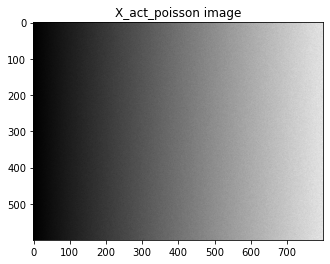

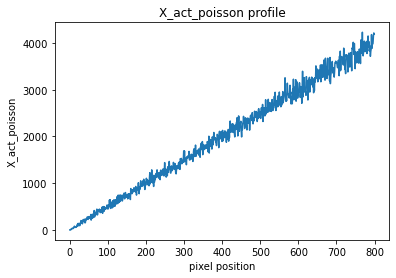

In [ ]:
X_act_poisson = k * np.random.poisson(X_exp / k)  # The Poisson noise term of Equation (5)

print(X_act_poisson[0])
plt.title('X_act_poisson image')
plt.imshow(X_act_poisson[0], 'gray')
plt.show()
plt.title('X_act_poisson profile')
plt.plot(X_act_poisson[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_act_poisson')
plt.show()

#### The Gaussian noise term in Equation (5)
$$
N(0,\sigma^2)
$$

[[  3.23776886 -93.33335431  43.48161903 ...  -6.33472257 -21.51971087
  103.84563446]
 [ 20.6417143   64.39134735 -55.64765585 ...  45.22309605 -88.75088079
  -24.27474939]
 [-11.91511233  14.5707016  -29.72160993 ... -42.44130612  99.03115419
   21.31881461]
 ...
 [-71.82819399  49.41676871 -68.97569484 ...   8.551258    -7.00677542
   37.42860049]
 [ 27.25527875  29.50277507 -50.37345729 ...  21.3040876   13.72595646
   15.69591098]
 [-45.81839898 -60.42690962   3.86472883 ... -41.31020695   0.80807033
   63.4199392 ]]


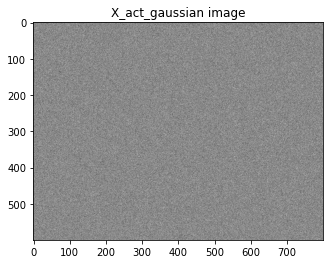

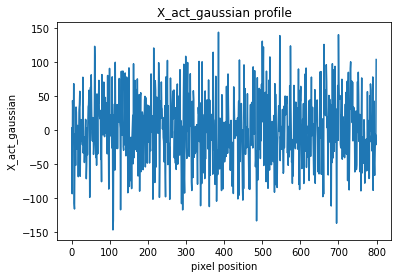

In [ ]:
X_act_gaussian = np.random.normal(0, np.sqrt(sigma2), imgsize)  # The Gaussian noise term in Equation (5)

print(X_act_gaussian[0])
plt.title('X_act_gaussian image')
plt.imshow(X_act_gaussian[0], 'gray')
plt.show()
plt.title('X_act_gaussian profile')
plt.plot(X_act_gaussian[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_act_gaussian')
plt.show()

#### Equation (5)
$$
x \sim kP\left(\frac{x^*}{k}\right) + N(0,\sigma^2) \tag{5}
$$

[[ 3.23776886e+00 -9.33333543e+01  5.34816190e+01 ...  4.14366528e+03
   4.19348029e+03  4.29384563e+03]
 [ 2.06417143e+01  7.43913474e+01 -4.06476559e+01 ...  4.05522310e+03
   3.77624912e+03  3.85072525e+03]
 [-1.19151123e+01  1.95707016e+01 -2.47216099e+01 ...  3.99255869e+03
   4.04903115e+03  3.98131881e+03]
 ...
 [-7.18281940e+01  4.94167687e+01 -4.89756948e+01 ...  3.91855126e+03
   4.11799322e+03  3.84242860e+03]
 [ 2.72552787e+01  2.95027751e+01 -4.53734573e+01 ...  3.96630409e+03
   3.78372596e+03  3.91069591e+03]
 [-4.58183990e+01 -5.54269096e+01  8.86472883e+00 ...  3.92368979e+03
   3.86080807e+03  3.88341994e+03]]


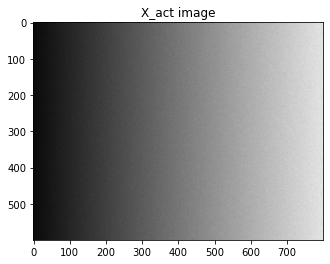

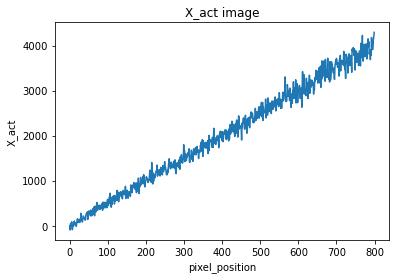

In [9]:
X_act = X_act_poisson + X_act_gaussian

print(X_act[0])
plt.title('X_act image')
plt.imshow(X_act[0], 'gray')
plt.show()
plt.title('X_act image')
plt.plot(X_act[0,0,:])
plt.xlabel('pixel_position')
plt.ylabel('X_act')
plt.show()

## 3.2 Parameter Estimation

Verify that "3.1 Noise Model" is correctly implemented.

#### Calculate the Mean
The image averaged over 100 images is shown in the figure "X_act_mean image" below.

[[ 2.99057221e+00 -2.28802434e+00  1.47134360e+01 ...  3.96466783e+03
   3.98513067e+03  4.00058362e+03]
 [ 9.21450912e-01  4.21547040e+00  1.18501585e+01 ...  3.96518311e+03
   3.96601864e+03  3.96918741e+03]
 [ 3.50256598e+00  2.52463107e+00  1.69556533e+01 ...  3.97899259e+03
   4.00720307e+03  3.96904869e+03]
 ...
 [-8.20021263e-01  7.03717017e+00  7.40398086e+00 ...  3.93961094e+03
   3.99803556e+03  3.97599543e+03]
 [ 4.29421750e+00  4.89814737e+00  1.22063237e+01 ...  3.98627059e+03
   3.98372633e+03  4.01574554e+03]
 [-4.52157920e+00  3.68006466e+00  1.05769159e+01 ...  3.99312701e+03
   3.98937221e+03  3.98234615e+03]]


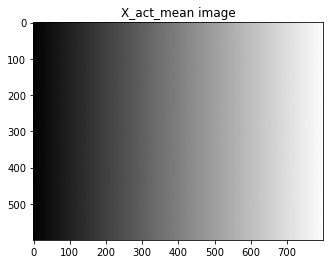

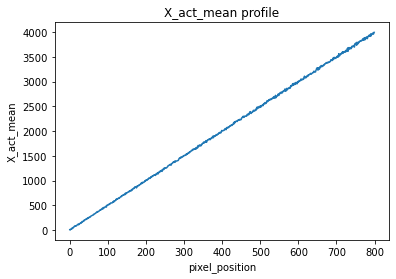

In [10]:
X_act_mean = np.mean(X_act, axis=0)

print(X_act_mean)
plt.title('X_act_mean image')
plt.imshow(X_act_mean, 'gray')
plt.show()
plt.title('X_act_mean profile')
plt.plot(X_act_mean[0,:])
plt.xlabel('pixel_position')
plt.ylabel('X_act_mean')
plt.show()

#### Calculate Variance

Calculate the variance of the values at the same pixel position for 100 images.

When plotting the mean and variance, it will look like the "X_act_var profile".

[[ 2526.79559962  2724.87552587  2290.99329383 ... 23429.77494932
  23332.67910408 19638.08554139]
 [ 2584.23490307  2816.9476607   2566.33752957 ... 20253.31613698
  22818.36096878 22432.34003568]
 [ 2690.12524758  2471.35716916  2421.15918732 ... 19280.86657989
  21161.7983297  20805.22062065]
 ...
 [ 2812.09139792  2617.4957241   2903.21676734 ... 22351.45108514
  19719.24213293 26135.97569083]
 [ 2980.56511078  1988.54246521  2277.18553806 ... 20518.08145103
  22117.70186831 22445.89413749]
 [ 2538.3101354   2483.38290535  2724.1644403  ... 19381.41959019
  14574.86154209 19631.09465433]]


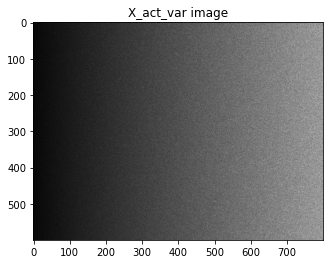

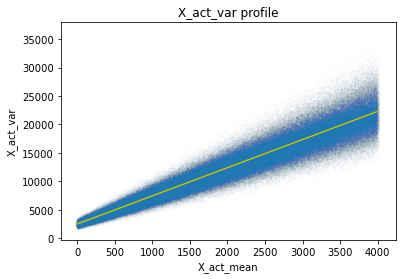

In [11]:
X_act_var = np.var(X_act, axis=(0))
print(X_act_var)
plt.title('X_act_var image')
plt.imshow(X_act_var, 'gray')
plt.show()
plt.title('X_act_var profile')
plt.scatter(X_act_mean.flatten(),X_act_var.flatten(),s=1,alpha=0.01)
config = np.polyfit(X_act_mean.flatten(),X_act_var.flatten(),1)
x = np.array([0,4000])
y = np.poly1d(config)(x)
plt.plot(x, y,'y')
plt.xlabel('X_act_mean')
plt.ylabel('X_act_var')
plt.show()

#### Determine "k" and "sigma2"
By performing a first-order approximation, we can determine "k" and "sigma2" and compare them with the true values, which are found to be close.

Therefore, it can be confirmed that "3.1 Noise Model" has been correctly implemented.

In [12]:
print(f'k: {k}, sigma2: {sigma2}')
print(f'k_pred: {config[0]}, sigma2_pred: {config[1]}')

k: 5.0, sigma2: 2525
k_pred: 4.951710798000412, sigma2_pred: 2499.524522273235


### Try it on real image
<p>Image source: <a href="https://github.com/cchen156/Learning-to-See-in-the-Dark" target="_blank" rel="nofollow noopener">"Learning to See in the Dark"</a><p>

In [13]:
import cv2
import rawpy

In [14]:
def noise_model(input_array, k, sigma2):
    output = k * np.random.poisson(input_array / k) + np.random.normal(0, np.sqrt(sigma2), input_array.shape)
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [15]:
path = './images/10106_00_30s.arw'
raw = rawpy.imread(path)
raw_post = raw.postprocess(use_camera_wb=True, half_size=True, no_auto_bright=True, output_bps=8)

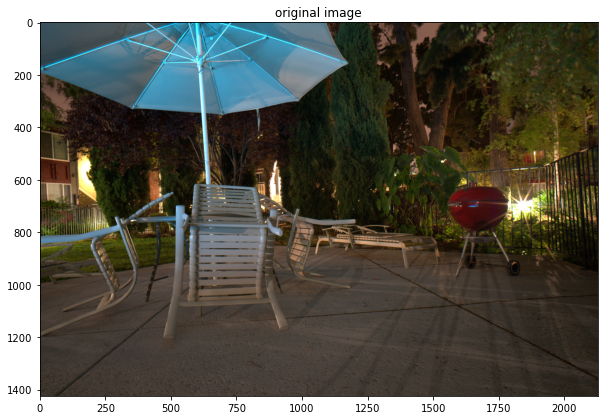

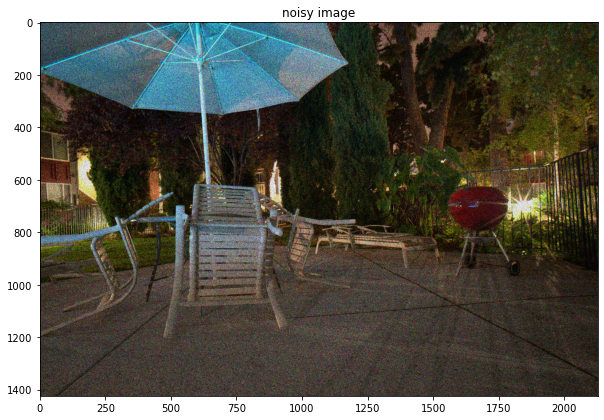

In [16]:
k = 30         # config
sigma2 = 30    # config

# Original
plt.figure(figsize=(10,15))
plt.title('original image')
plt.imshow(raw_post)
plt.show()

# Add noise
noisy_image = noise_model(raw_post, k, sigma2)
plt.figure(figsize=(10,15))
plt.title('noisy image')
plt.imshow(noisy_image)
plt.show()